In [1]:
# importing libraries
import scipy
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import sklearn
import seaborn as sn

In [2]:
# loading dataset
dataset = pd.read_excel("ICUfinal.xlsx")

dataset.head(2)

,Unnamed: 0,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,...,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,tags,ICU
0,0,0,1,60th,0,0.0,0.0,1.0,NaN,NaN,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0-2,"Motor Neurone Disease, Smoker",0
1,1,0,1,60th,0,0.0,0.0,1.0,NaN,NaN,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2-4,"Motor Neurone Disease, Smoker",0


In [3]:
print(dataset.shape) # 227 features, 1925 rows
print(str(dataset['PATIENT_VISIT_IDENTIFIER'].nunique()) + " unique patients")

(1925, 227)
385 unique patients


In [4]:
print(dataset.groupby('ICU').size()) # distribution of two classes={0, 1}

ICU
0    1410
1     515
dtype: int64


In [5]:
dataset.info()
# we can observe that data contains 219 floats and 5 integers and 3 object columns
# this can help us in later cleaning the dataset or casting objects to integers.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Columns: 227 entries, Unnamed: 0 to ICU
dtypes: float64(219), int64(5), object(3)
memory usage: 3.3+ MB


In [6]:
# deleting duplicate rows
duplicates = dataset[dataset.duplicated()]
print("duplicated rows are: ", duplicates.shape)
# there is no duplicated rows in this dataset

duplicated rows are:  (0, 227)


In [7]:
# inorder to casting object values to integers we need to figure out the unique رalues of the object columns
# AGE_PERCENTIL
print("unique values of AGE_PERCENTIL column are:", *list(dataset['AGE_PERCENTIL'].unique()))
# WINDOW
print("unique values of WINDOW column are:", *list(dataset['WINDOW'].unique()))
# tags
print("unique values of tags column are:", *list(dataset['tags'].unique()) )

# therefore we need 10 integers for AGE_PERCENTIL and 5 integers for WINDOW to convert object values to integers.

unique values of AGE_PERCENTIL column are: 60th 90th 10th 40th 70th 20th 50th 80th 30th Above 90th
unique values of WINDOW column are: 0-2 2-4 4-6 6-12 ABOVE_12
unique values of tags column are: Motor Neurone Disease, Smoker nan Motor Neurone Disease Lung cancer asthma, Kidney disease, Motor Neurone Disease asthma, Motor Neurone Disease Smoker asthma, Kidney disease asthma heart disease, Kidney disease heart disease asthma, Motor Neurone Disease, Smoker Lung cancer, asthma, Motor Neurone Disease, Smoker Lung cancer, Motor Neurone Disease Lung cancer, asthma, Motor Neurone Disease asthma, Smoker Kidney disease heart disease, Motor Neurone Disease Lung cancer, asthma heart disease, asthma, Smoker heart disease, asthma, Motor Neurone Disease Lung cancer, heart disease Lung cancer, asthma, Smoker heart disease, asthma Lung cancer, Smoker Lung cancer, heart disease, asthma, Motor Neurone Disease Lung cancer, asthma, Kidney disease, Motor Neurone Disease, Smoker Lung cancer, heart disease, M

In [8]:
# this shows us some good features of the integer columns
dataset.describe().T
# in our dataset there are some columns which their means are less than their median and some other which their means are greater than median.

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1925.0,962.000000,555.843953,0.0,481.0,962.000000,1443.000000,1924.0
PATIENT_VISIT_IDENTIFIER,1925.0,192.000000,111.168431,0.0,96.0,192.000000,288.000000,384.0
AGE_ABOVE65,1925.0,0.467532,0.499074,0.0,0.0,0.000000,1.000000,1.0
GENDER,1925.0,0.368831,0.482613,0.0,0.0,0.000000,1.000000,1.0
HTN,1920.0,0.213021,0.409549,0.0,0.0,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...
HEART_RATE_DIFF_REL,1240.0,-0.817800,0.270217,-1.0,-1.0,-0.989822,-0.662529,1.0
RESPIRATORY_RATE_DIFF_REL,1177.0,-0.719147,0.446600,-1.0,-1.0,-1.000000,-0.634409,1.0
TEMPERATURE_DIFF_REL,1231.0,-0.771327,0.317694,-1.0,-1.0,-0.975924,-0.594677,1.0
OXYGEN_SATURATION_DIFF_REL,1239.0,-0.886982,0.296772,-1.0,-1.0,-0.980333,-0.880155,1.0


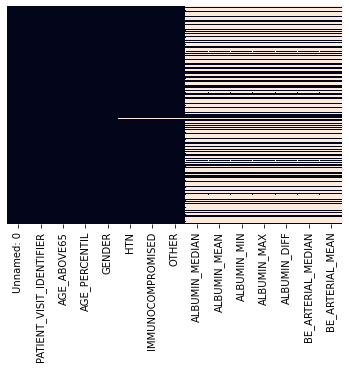

In [9]:
# we plot heatmap to see NaNs. because of the large number of features i only plot the first 15 columns heatmap.
sn.heatmap(dataset.iloc[:, 0:15].isnull(), cbar=False, yticklabels=False);
# the white color shows NaN, there are alot of NaN cells in our dataset
# next we try to fill these NaNs with suitable superseded.

In [10]:
pd.options.mode.chained_assignment = None  # default='warn'

# changing values of AGE_PERCENTIL column
for i in range(len(dataset['AGE_PERCENTIL'])):
        if dataset['AGE_PERCENTIL'][i] == 'Above 90th':
            dataset['AGE_PERCENTIL'][i] = 10
        else:
            dataset['AGE_PERCENTIL'][i] = int(dataset['AGE_PERCENTIL'][i][0])

In [11]:
# changing values of WINDOW column
for i in range(len(dataset['WINDOW'])):
        if dataset['WINDOW'][i] == '0-2':
            dataset['WINDOW'][i] = 0
        elif dataset['WINDOW'][i] == '2-4':
            dataset['WINDOW'][i] = 1
        elif dataset['WINDOW'][i] == '4-6':
            dataset['WINDOW'][i] = 2
        elif dataset['WINDOW'][i] == '6-12':
            dataset['WINDOW'][i] = 3
        elif dataset['WINDOW'][i] == 'ABOVE_12':
            dataset['WINDOW'][i] = 4

In [12]:
# filling tags empty cells with None
NoneCellsOfTags = pd.isna(dataset['tags'])
for i in range(len(NoneCellsOfTags)):
    if NoneCellsOfTags[i] == True:
        dataset['tags'][i] = 'None'

In [13]:
# finding unique sicknesse in tags columns
tagsUniqueCells = dataset['tags'].unique()
tagsUniqueCells = list(tagsUniqueCells)
uniqueSicknesses = []
for i in range(len(tagsUniqueCells)):
    if tagsUniqueCells[i] != 'None':
        splited = tagsUniqueCells[i].split(', ')
        for j in range(len(splited)):
            if splited[j] in uniqueSicknesses:
                continue
            uniqueSicknesses.append(splited[j])
print(uniqueSicknesses)
# making a column for each sickness and fill them correctly.
for i in uniqueSicknesses:
    l = []
    for j in range(len(dataset["tags"])):
        if i in dataset["tags"][j].split(', '):
            l.append(1)
        else:
            l.append(0)
    dataset[i] = l
del dataset['tags']

['Motor Neurone Disease', 'Smoker', 'Lung cancer', 'asthma', 'Kidney disease', 'heart disease']


In [14]:
dataset.head(3)

,Unnamed: 0,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,...,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU,Motor Neurone Disease,Smoker,Lung cancer,asthma,Kidney disease,heart disease
0,0,0,1,6,0,0.0,0.0,1.0,NaN,NaN,...,-1.0,-1.0,0,0,1,1,0,0,0,0
1,1,0,1,6,0,0.0,0.0,1.0,NaN,NaN,...,-1.0,-1.0,1,0,1,1,0,0,0,0
2,2,0,1,6,0,0.0,0.0,1.0,0.605263,0.605263,...,NaN,NaN,2,0,1,1,0,0,0,0


In [15]:
# moving ICU column so that it will be the last column in our dataset.
tempICU = dataset["ICU"]
del dataset['ICU']
dataset['ICU'] = tempICU
dataset.head(10)

,Unnamed: 0,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,...,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,Motor Neurone Disease,Smoker,Lung cancer,asthma,Kidney disease,heart disease,ICU
0,0,0,1,6,0,0.0,0.0,1.0,NaN,NaN,...,-1.000000,-1.000000,0,1,1,0,0,0,0,0
1,1,0,1,6,0,0.0,0.0,1.0,NaN,NaN,...,-1.000000,-1.000000,1,1,1,0,0,0,0,0
2,2,0,1,6,0,0.0,0.0,1.0,0.605263,0.605263,...,NaN,NaN,2,1,1,0,0,0,0,0
3,3,0,1,6,0,0.0,0.0,1.0,NaN,NaN,...,-1.000000,-1.000000,3,1,1,0,0,0,0,0
4,4,0,1,6,0,0.0,0.0,1.0,0.000000,0.000000,...,-0.242282,-0.814433,4,1,1,0,0,0,0,1
5,5,1,1,9,1,1.0,1.0,1.0,NaN,NaN,...,-1.000000,-1.000000,0,0,0,0,0,0,0,1
6,6,1,1,9,1,1.0,1.0,1.0,-0.210526,-0.210526,...,-1.000000,-1.000000,1,0,0,0,0,0,0,1
7,7,1,1,9,1,1.0,1.0,1.0,NaN,NaN,...,-1.000000,-1.000000,2,0,0,0,0,0,0,1
8,8,1,1,9,1,1.0,1.0,1.0,0.605263,0.605263,...,-0.882574,-1.000000,3,0,0,0,0,0,0,1
9,9,1,1,9,1,1.0,1.0,1.0,0.605263,0.605263,...,0.139709,-0.802317,4,1,0,0,0,0,0,1


In [16]:
# again we take a look at the dataset's information to see the changes we have made
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Columns: 232 entries, Unnamed: 0 to ICU
dtypes: float64(219), int64(11), object(2)
memory usage: 3.4+ MB


In [17]:
# there are alot of empty cells in our dataset. I read the kaggle description of dataset. and the author suggested to
# estimate these empty cells by their neighbors' values.
dataset = dataset\
    .sort_values(by=['PATIENT_VISIT_IDENTIFIER', 'WINDOW'])\
    .groupby('PATIENT_VISIT_IDENTIFIER', as_index=False)\
    .fillna(method='ffill')\
    .fillna(method='bfill')

In [18]:
# there is another way to fill the emoty cells. we can fill float columns by the mean of each column and integer columns by
# zero. this is done in two following cells.

In [19]:
# we set empty cells of float columns by the mean of each column

# types of columns of our dataset
# for i in range(len(dataType)):
#     if dataType[i] == 'float64':
#         dataset[dataset.columns[i]] = dataset[dataset.columns[i]].fillna(dataset[dataset.columns[i]].mean())

In [20]:
dataset.head(10)

,Unnamed: 0,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,...,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,Motor Neurone Disease,Smoker,Lung cancer,asthma,Kidney disease,heart disease,ICU
0,0,0,1,6,0,0.0,0.0,1.0,0.605263,0.605263,...,-1.000000,-1.000000,0,1,1,0,0,0,0,0
1,1,0,1,6,0,0.0,0.0,1.0,0.605263,0.605263,...,-1.000000,-1.000000,1,1,1,0,0,0,0,0
2,2,0,1,6,0,0.0,0.0,1.0,0.605263,0.605263,...,-1.000000,-1.000000,2,1,1,0,0,0,0,0
3,3,0,1,6,0,0.0,0.0,1.0,0.605263,0.605263,...,-1.000000,-1.000000,3,1,1,0,0,0,0,0
4,4,0,1,6,0,0.0,0.0,1.0,0.000000,0.000000,...,-0.242282,-0.814433,4,1,1,0,0,0,0,1
5,5,1,1,9,1,1.0,1.0,1.0,-0.210526,-0.210526,...,-1.000000,-1.000000,0,0,0,0,0,0,0,1
6,6,1,1,9,1,1.0,1.0,1.0,-0.210526,-0.210526,...,-1.000000,-1.000000,1,0,0,0,0,0,0,1
7,7,1,1,9,1,1.0,1.0,1.0,-0.210526,-0.210526,...,-1.000000,-1.000000,2,0,0,0,0,0,0,1
8,8,1,1,9,1,1.0,1.0,1.0,0.605263,0.605263,...,-0.882574,-1.000000,3,0,0,0,0,0,0,1
9,9,1,1,9,1,1.0,1.0,1.0,0.605263,0.605263,...,0.139709,-0.802317,4,1,0,0,0,0,0,1


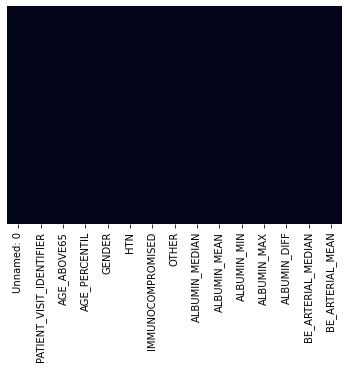

In [21]:
# we again plot heatmap to see if there is anu other NaN in our dataset.
sn.heatmap(dataset.iloc[:, 0:15].isnull(), cbar=False, yticklabels=False);

In [22]:
# finding outliers

dataType = dataset.dtypes
def outliers(column):
    outs = []
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    dif = Q3 - Q1
    lower_bound = Q1 - (1.5 * dif)
    upper_bound = Q3 + (1.5 * dif)
    for cell in column:
        if cell > upper_bound or cell < lower_bound:
            outs.append(cell)
    return len(outs)

n_outliers = []

for i in range(0, len(dataset.columns)):
    if dataType[i] == 'float64':
        n_outliers.append(outliers(dataset[dataset.columns[i]]))
    else:
        n_outliers.append(0)

In [23]:
from statistics import mean, median

print("mean number of outliers of columns is: ", mean(n_outliers))
print("median of outliers of columns is: ", median(n_outliers))
print("min number of outliers of columns is: ", min(n_outliers))
print("max number of outliers of columns is: ", max(n_outliers))

mean number of outliers of columns is:  190.93534482758622
median of outliers of columns is:  126.0
min number of outliers of columns is:  0
max number of outliers of columns is:  769


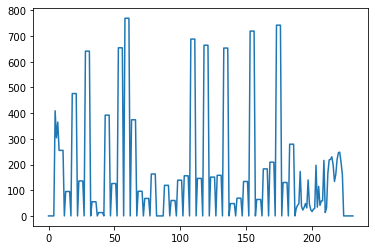

In [24]:
# distribution of outliers over features
plt.plot(n_outliers)
plt.show()

In [25]:
# deleting columns with more than 500 outliers
threshold = 500
highOuts = []
for i in range(len(n_outliers)):
    if n_outliers[i] >= 500:
        highOuts.append(dataset.columns[i])
for i in highOuts:
    del dataset[i]
    
print(dataset.shape)

(1925, 200)


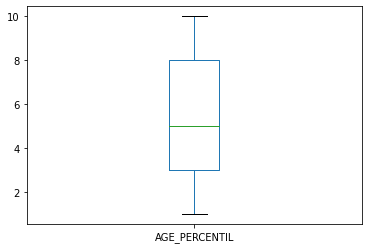

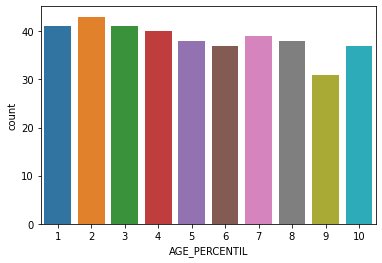

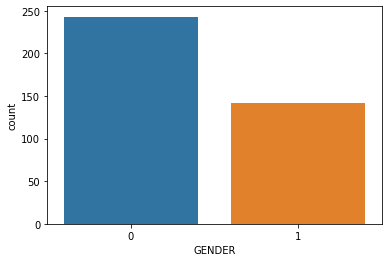

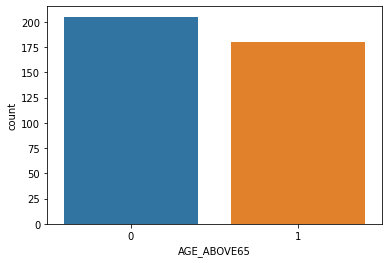

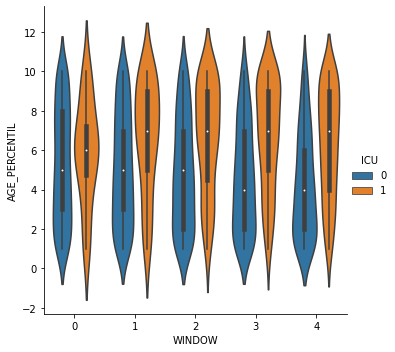

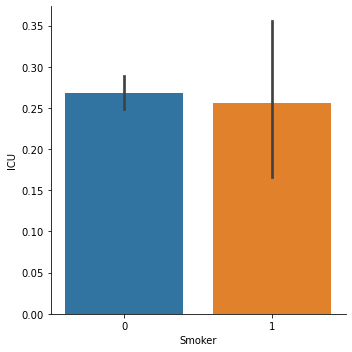

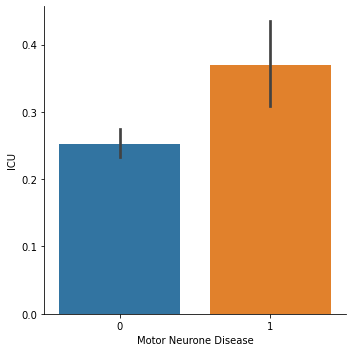

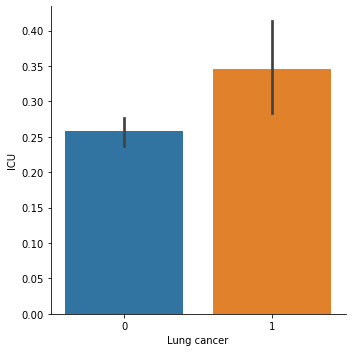

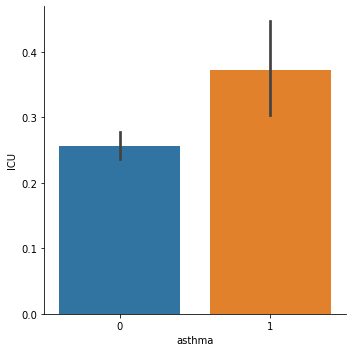

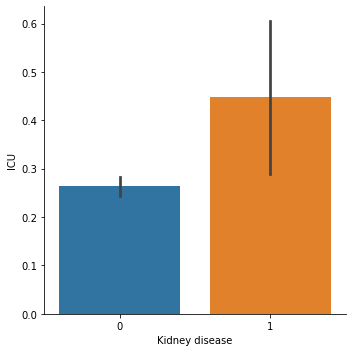

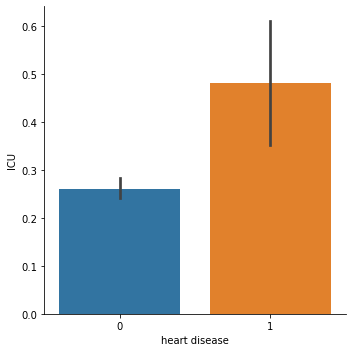

In [26]:
# data visualization

# I am going to plot some of the features in order to figure out their distribution and some other things

# AGE_PERCENTIL
dataset['AGE_PERCENTIL'].plot(kind='box', subplots=True, sharex=False, sharey=False)
plt.show()
sn.countplot(x='AGE_PERCENTIL', data=dataset.loc[dataset['WINDOW'] == 0])
plt.show()
# Ages of pateints do not show any useful information.

# GENDER
sn.countplot(x='GENDER', data=dataset.loc[dataset['WINDOW'] == 0])
plt.show()

# AGE_ABOVE65
sn.countplot(x='AGE_ABOVE65', data=dataset.loc[dataset['WINDOW'] == 0])
plt.show()

# WINDOW, AGE_PERCENTIL, ICU
sn.catplot(x="WINDOW", y="AGE_PERCENTIL", hue="ICU", kind="violin", data=dataset)
plt.show()
# the result of this plot is very interesting, it shows that if the patient being cheked sooner, it is very likely that even younger people need ICU.
# However, if they be checked later from the time they came into hospital, mostly old people need ICU.

# Smoker, ICU
sn.catplot(x="Smoker", y="ICU", kind="bar", data=dataset)
plt.show()
# smoking does not really matter here.

# Motor Neurone Disease, ICU
sn.catplot(x="Motor Neurone Disease", y="ICU", kind="bar", data=dataset)
plt.show()

# Lung cancer, ICU
sn.catplot(x="Lung cancer", y="ICU", kind="bar", data=dataset)
plt.show()

# asthma, ICU
sn.catplot(x='asthma', y="ICU", kind="bar", data=dataset)
plt.show()

# Kidney disease, ICU
sn.catplot(x='Kidney disease', y="ICU", kind="bar", data=dataset)
plt.show()

# heart disease, ICU
sn.catplot(x='heart disease', y="ICU", kind="bar", data=dataset)
plt.show()
# heart disease has a stronger relationship with ICU

ALBUMIN_MEDIAN


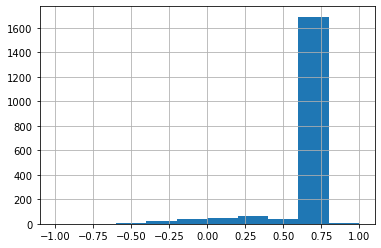

TEMPERATURE_DIFF_REL


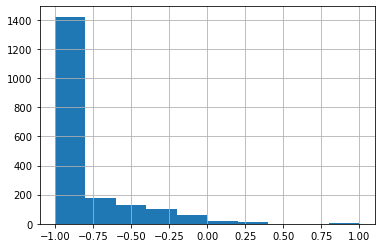

OXYGEN_SATURATION_DIFF


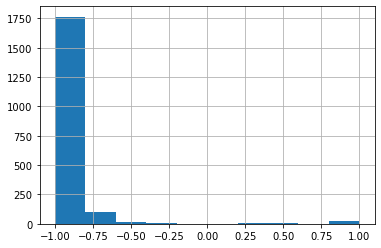

BE_ARTERIAL_DIFF


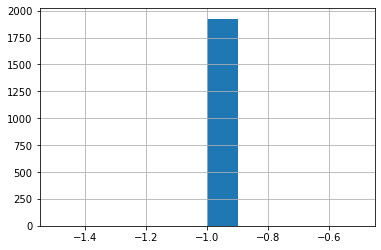

BIC_ARTERIAL_MEDIAN


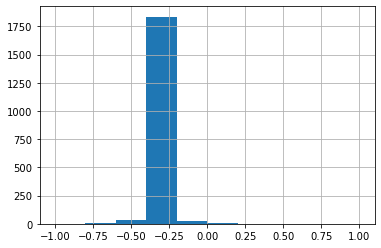

In [27]:
# Histograms pf some of the rows

print('ALBUMIN_MEDIAN')
dataset['ALBUMIN_MEDIAN'].hist()
plt.show()

print('TEMPERATURE_DIFF_REL')
dataset['TEMPERATURE_DIFF_REL'].hist()
plt.show()

print('OXYGEN_SATURATION_DIFF')
dataset['OXYGEN_SATURATION_DIFF'].hist()
plt.show()

print('BE_ARTERIAL_DIFF')
dataset['BE_ARTERIAL_DIFF'].hist()
plt.show()

print('BIC_ARTERIAL_MEDIAN')
dataset['BIC_ARTERIAL_MEDIAN'].hist()
plt.show()

# the last two plots show that our dataset needs to be normalized.

NEUTROPHILES_MEDIAN


c:\users\asus zenbook\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


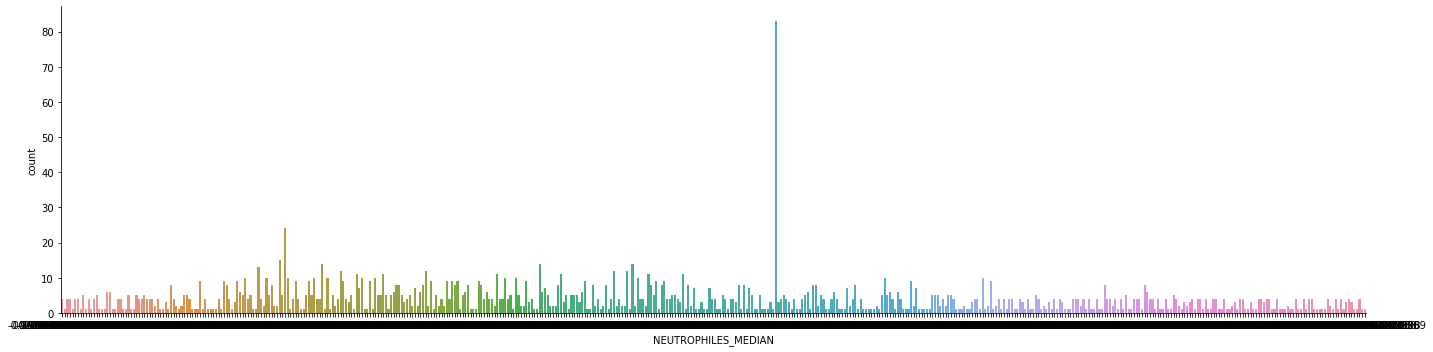

CREATININ_MEAN


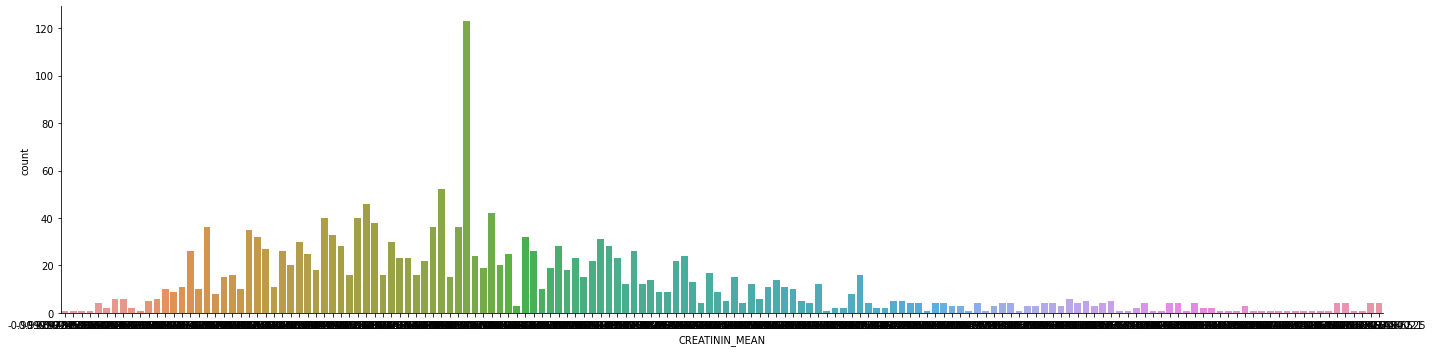

In [28]:
# NEUTROPHILES_MEDIAN
print("NEUTROPHILES_MEDIAN")
sn.factorplot('NEUTROPHILES_MEDIAN', data=dataset, aspect=4, kind='count')
plt.show()

# SAT02_VENOUS_MEAN
print("CREATININ_MEAN")
sn.factorplot('CREATININ_MEAN', data=dataset, aspect=4, kind='count')
plt.show()

# these two plots can show us that even continues columns are mostly focused in limited places in their factor plots

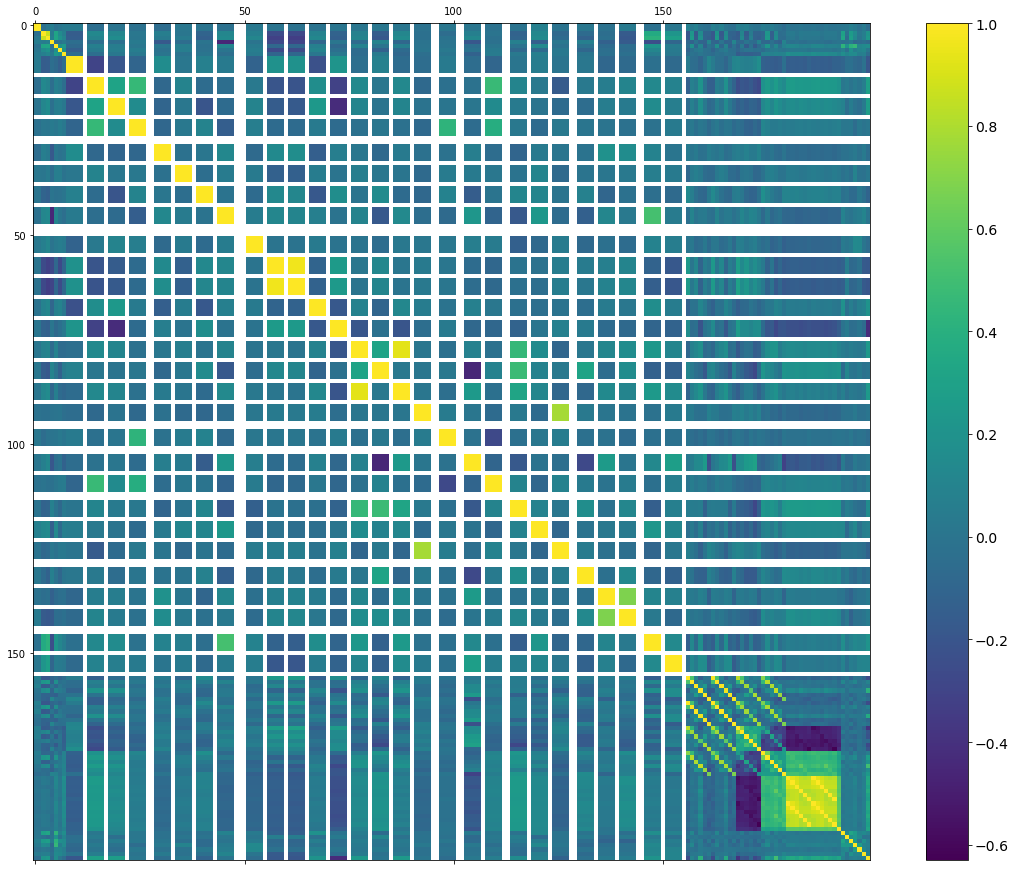

In [29]:
correlations = dataset.corr(method='spearman')
f = plt.figure(figsize=(20, 15))
plt.matshow(correlations, fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
# yellow shows positive correlation, dark blue shows negative correlation.
# I am going to save those two features which their correlation is higher than 0.9 or less than -0.75. they are dependent.
pos_corrs = []
for i in range(1, len(correlations)-1):
    for j in range(i+1, len(correlations[correlations.columns[i]])-1):
        if correlations[correlations.columns[i]][correlations.columns[j]] >= 0.9 or correlations[correlations.columns[i]][correlations.columns[j]] <= -0.75:
            pos_corrs.append([i, j])
# print(pos_corrs)

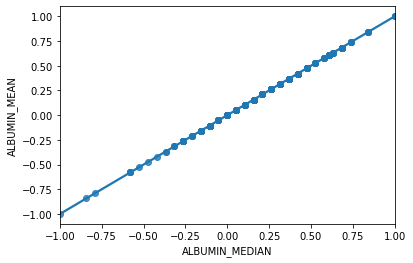

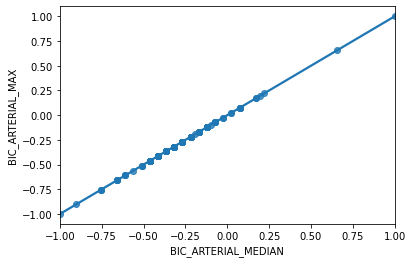

In [30]:
# in order to see the relationship between those in pos_corrs I plot some of them here.
sn.regplot(x=dataset[dataset.columns[pos_corrs[0][0]]], y=dataset[dataset.columns[pos_corrs[0][1]]])
plt.show()

sn.regplot(x=dataset[dataset.columns[pos_corrs[20][0]]], y=dataset[dataset.columns[pos_corrs[20][1]]])
plt.show()

In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
from sklearn import metrics
simplefilter("ignore", category=ConvergenceWarning)

In [32]:
# we have no idea about which model can be better for our dataset. we should test some models first
# with different parameter setting and then decide which one in better on our dataset. better -> higher fscore
# we are going to test:
# 1) Logistic Regression 
# 2) Gaussian Naive Bayes
# 3) Decision Tree Classifier
# 4) K-Nearest Neighbors
# 5) Support Vector Machine
# 6) Neural Network
# 7) Random Forest Classifier

In [33]:
def trainTest0(window):
    # I am going to use different WINDOW sizes to predict if a patient need ICU.
    dsWINDOW4 = dataset.loc[dataset['WINDOW'] == window]
    del dsWINDOW4['WINDOW']
    # I am going to find the features which are most relevant to ICU
    test = SelectKBest(score_func=f_classif, k=10)
    fit = test.fit(dsWINDOW4.iloc[:, 0:len(dsWINDOW4.columns)-1], dsWINDOW4["ICU"])
    # here we can see that we get feature are constants warning. therefore we need to remove those constant columns.
    dsWINDOW4 = dsWINDOW4.loc[:, (dsWINDOW4 != dsWINDOW4.iloc[0]).any()]
    # preprocessing
    x = dsWINDOW4.values
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    dsWINDOW4 = pd.DataFrame(x_scaled, columns = dsWINDOW4.columns)
    # dimension reduction
    # we also need to keep only more informative columns and drop others. I use Recursive Feature Elimination for this purpose.
    model = LogisticRegression(solver='liblinear')
    rfe = RFE(model, n_features_to_select=55, step=1000)
    fit = rfe.fit(dsWINDOW4.iloc[:, 0:len(dsWINDOW4.columns)-1], dsWINDOW4['ICU'])
    selected_features = list(fit.support_)
    # we know the most important features. now we reduce our dataset according to above results.
    selected_features.append(True)
    dsWINDOW4 = dsWINDOW4.iloc[:, selected_features]
    # for evaluating different models we need to have train and test data.
    from sklearn.model_selection import train_test_split
    X = dsWINDOW4.iloc[:, 0:len(dsWINDOW4.columns)-1]
    y = dsWINDOW4['ICU']
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=1)
    models = []
    names = []
    # 1) Logistic Regression with different parameters
    models.append(LogisticRegression(solver='liblinear', multi_class='ovr', max_iter=1000))
    names.append('LR + liblinear solver')
    models.append(LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000))
    names.append('LR + lbfgs solver')
    models.append(LogisticRegression(solver='saga', multi_class='auto', max_iter=1000))
    names.append('LR + saga solver')
    models.append(LogisticRegression(solver='sag', multi_class='ovr', max_iter=1000))
    names.append('LR + sag solver')
    # 2) Gaussian Naive Bayes
    models.append(GaussianNB())
    names.append('NB')
    # 3) Decision Tree Classifier
    models.append(DecisionTreeClassifier())
    names.append('Decision Tree')
    # 4) K-Nearest Neighbors
    models.append(KNeighborsClassifier())
    names.append('KNN')
    # 5) Support Vector Machine
    models.append(SVC(gamma='auto'))
    names.append('SVM + auto')
    models.append(SVC(gamma='scale'))
    names.append('SVM + scale')
    # 6) Neural Network
    models.append(MLPClassifier(activation='logistic', solver='lbfgs', hidden_layer_sizes=100,  max_iter=800))
    names.append('NN + logistic + lbfgs')
    models.append(MLPClassifier(activation='relu', solver='lbfgs', hidden_layer_sizes=100, max_iter=800))
    names.append('NN + relu + sgd')
    models.append(MLPClassifier(activation='tanh', solver='adam', hidden_layer_sizes=200, max_iter=800))
    names.append('NN + tanh + adam')
    models.append(MLPClassifier(activation='tanh', solver='lbfgs', hidden_layer_sizes=100, max_iter=800))
    names.append('NN + tanh + lbfgs')
    # 7) Random Forest Classifier
    models.append(RandomForestClassifier(max_depth=20, random_state=0))
    names.append('RFS')

    # training models
    results = []
    res = []
    print("Training models with WINDOW size: " + str(window))
    for i in range(len(models)):
        folds = StratifiedKFold(n_splits=10)
        results.append(cross_val_score(models[i], X_train, Y_train, cv=folds, scoring=metrics.make_scorer(metrics.f1_score, average='weighted')))
        print('%s: %f (%f)' % (names[i], results[i].mean(), results[i].std()))
        res.append(results[i].mean())
    # now we are going to test our models to see which one is better on test dataset.
    test_results = []
    preds = []
    print("Testing models with WINDOW size: " + str(window))
    for i, model in enumerate(models):
        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)
        preds.append(predictions)
        test_results.append(metrics.f1_score(Y_test, predictions))
        print('%s: %f' % (names[i], test_results[i]))
    return names, results, res, test_results, preds, Y_test, models, selected_features

In [34]:
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [35]:
ress = []
trainres = []
testres = []
preds = []
ys = []
models1 = []
selected_features1 = []
for window in range(0, 5):
    name, re, tr, te, pred, y_test, mo, sf = trainTest0(window)
    ress.append(re)
    trainres.append(tr)
    testres.append(te)
    preds.append(pred)
    ys.append(y_test)
    models1.append(mo)
    selected_features1.append(sf)

Training models with WINDOW size: 0
LR + liblinear solver: 0.918997 (0.033282)
LR + lbfgs solver: 0.915261 (0.025061)
LR + saga solver: 0.915261 (0.025061)
LR + sag solver: 0.915261 (0.025061)
NB: 0.901094 (0.069683)
Decision Tree: 0.908519 (0.047585)
KNN: 0.907673 (0.022310)
SVM + auto: 0.898971 (0.013946)
SVM + scale: 0.898971 (0.013946)
NN + logistic + lbfgs: 0.946626 (0.042383)
NN + relu + sgd: 0.928330 (0.041508)
NN + tanh + adam: 0.923951 (0.042680)
NN + tanh + lbfgs: 0.938433 (0.040804)
RFS: 0.924348 (0.042394)
Testing models with WINDOW size: 0
LR + liblinear solver: 0.533333
LR + lbfgs solver: 0.533333
LR + saga solver: 0.533333
LR + sag solver: 0.533333
NB: 0.782609
Decision Tree: 0.352941
KNN: 0.428571
SVM + auto: 0.000000
SVM + scale: 0.000000
NN + logistic + lbfgs: 0.700000
NN + relu + sgd: 0.736842
NN + tanh + adam: 0.666667
NN + tanh + lbfgs: 0.700000
RFS: 0.428571
Training models with WINDOW size: 1
LR + liblinear solver: 0.852702 (0.052677)
LR + lbfgs solver: 0.852702 

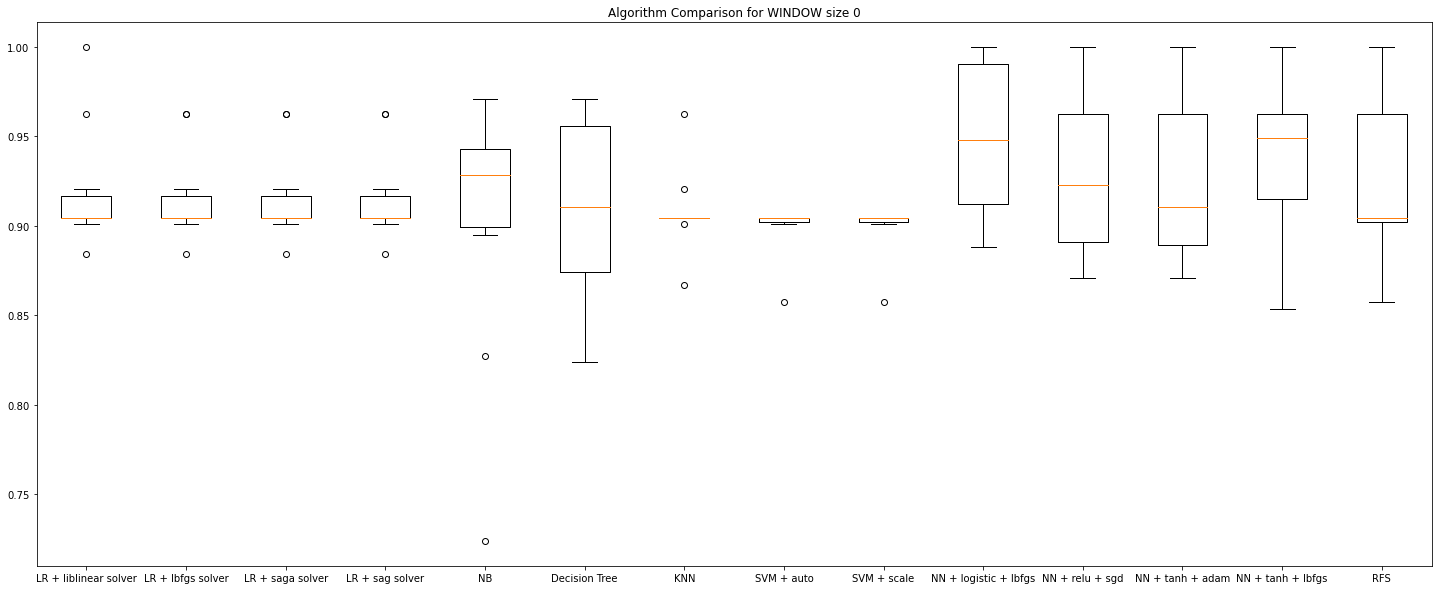

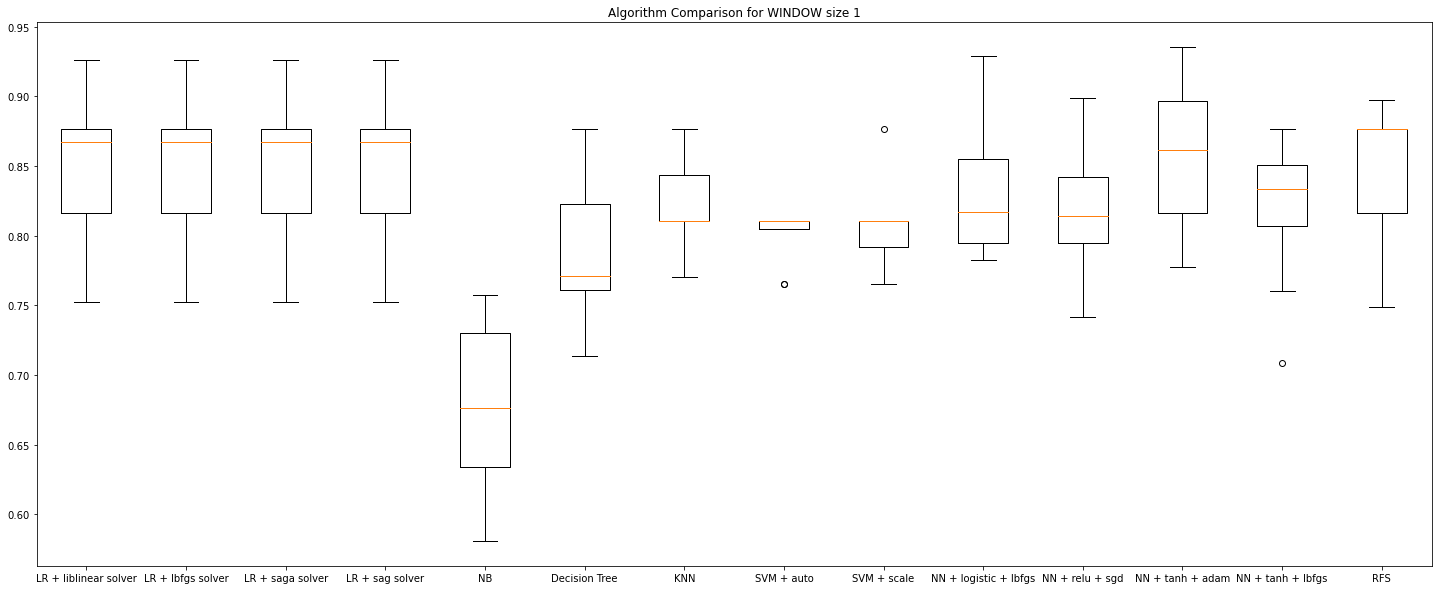

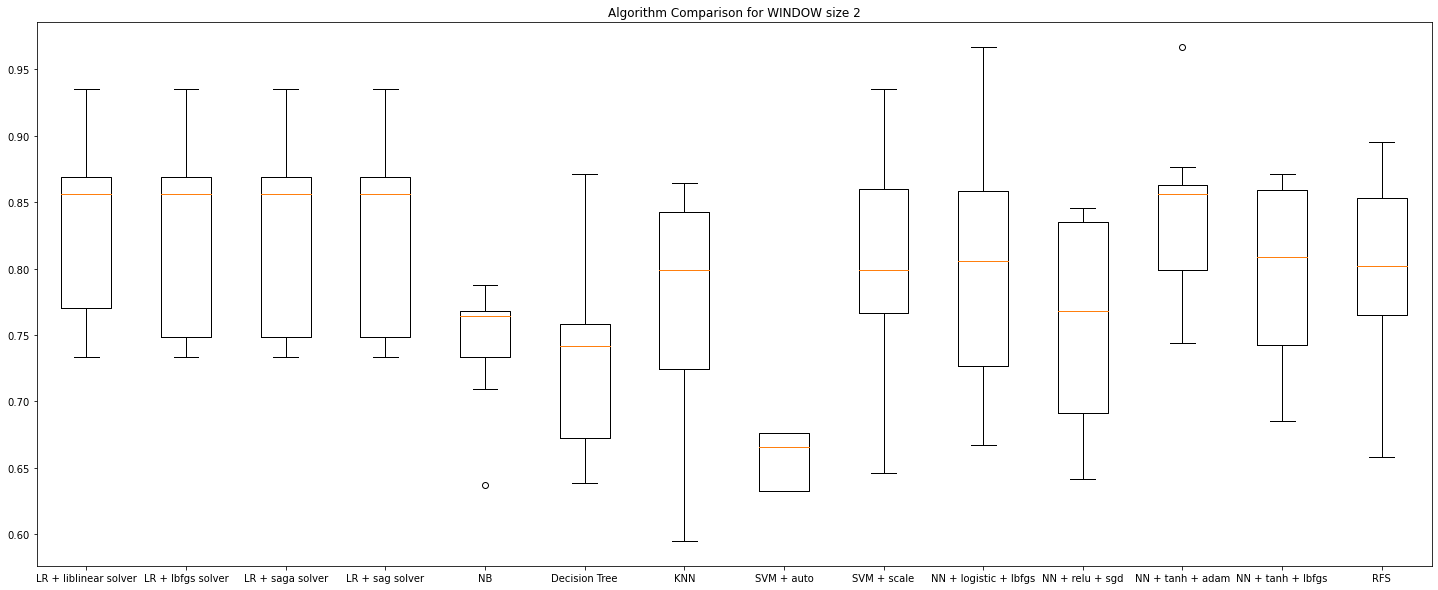

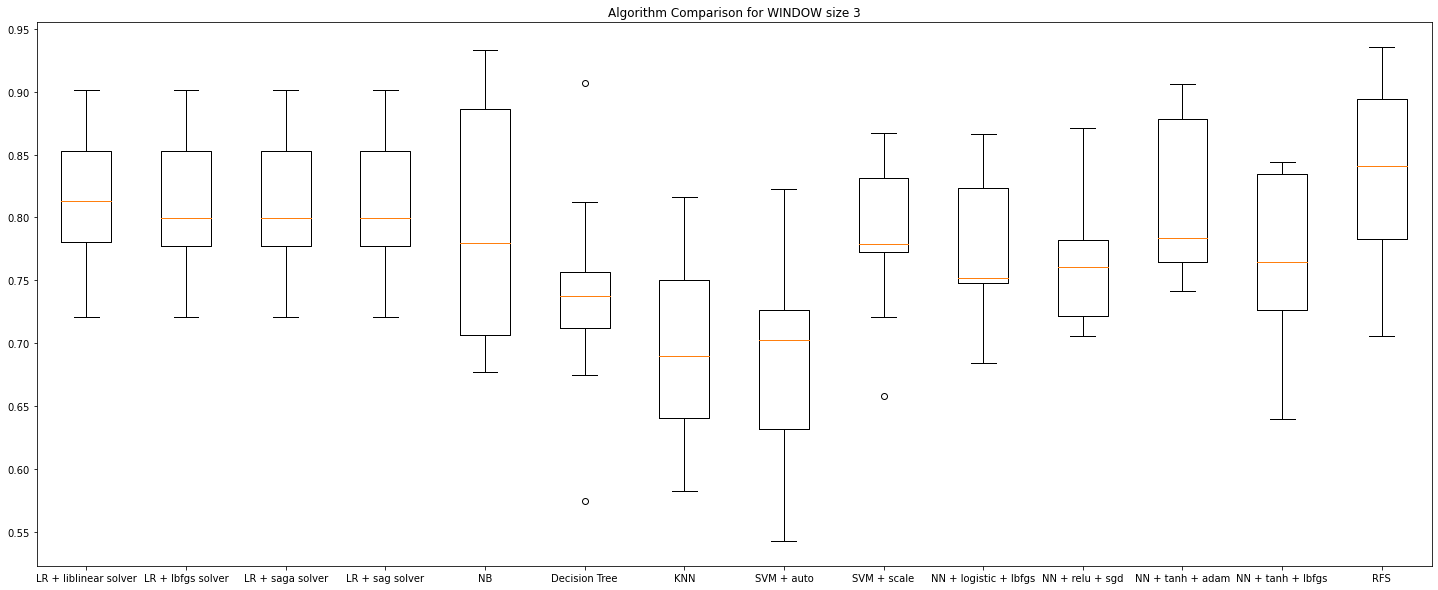

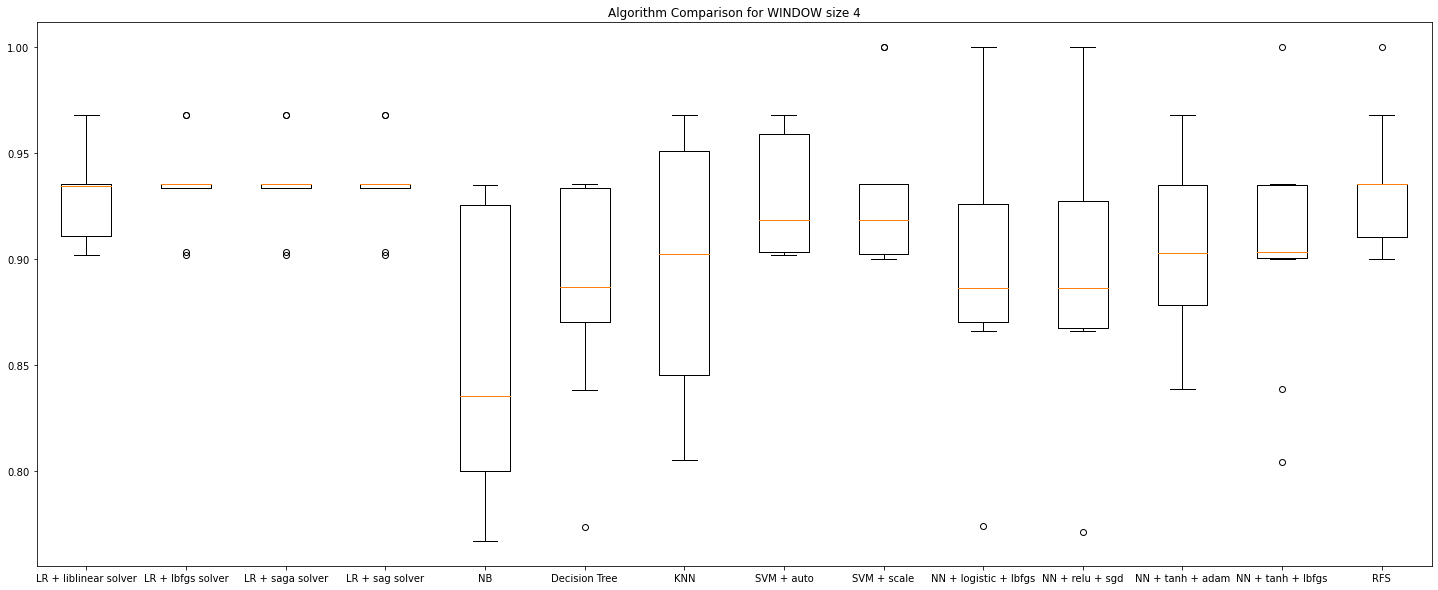

In [36]:
# results of train data
for window in range(0, 5):
    f = plt.figure(figsize=(25, 10))
    plt.boxplot(ress[window], labels=name)
    plt.title('Algorithm Comparison for WINDOW size ' + str(window))
    plt.show()

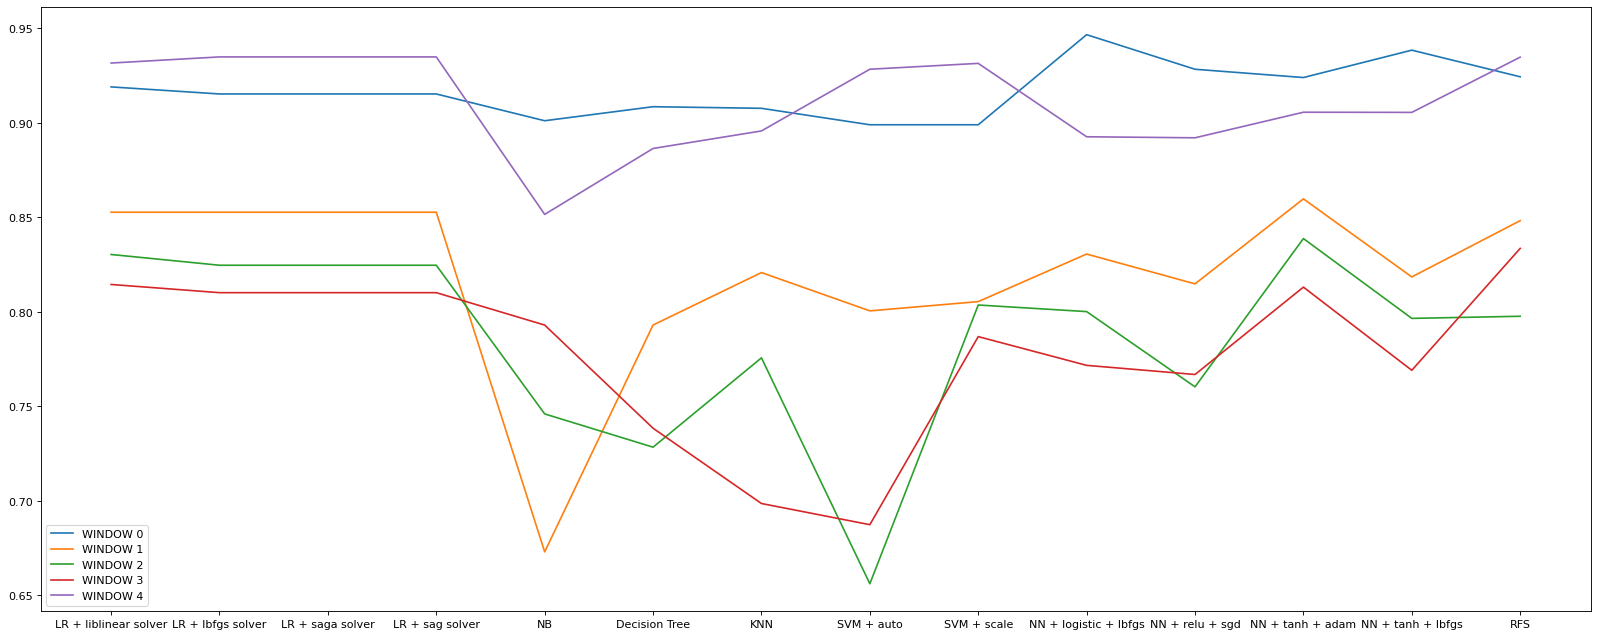

In [37]:
# results of train data     
plt.figure(figsize=(25,10), dpi= 80)

for window in range(0, 5):
    plt.plot(name, trainres[window], label=window)
plt.legend(['WINDOW 0', 'WINDOW 1', 'WINDOW 2', 'WINDOW 3', 'WINDOW 4'])
plt.show()

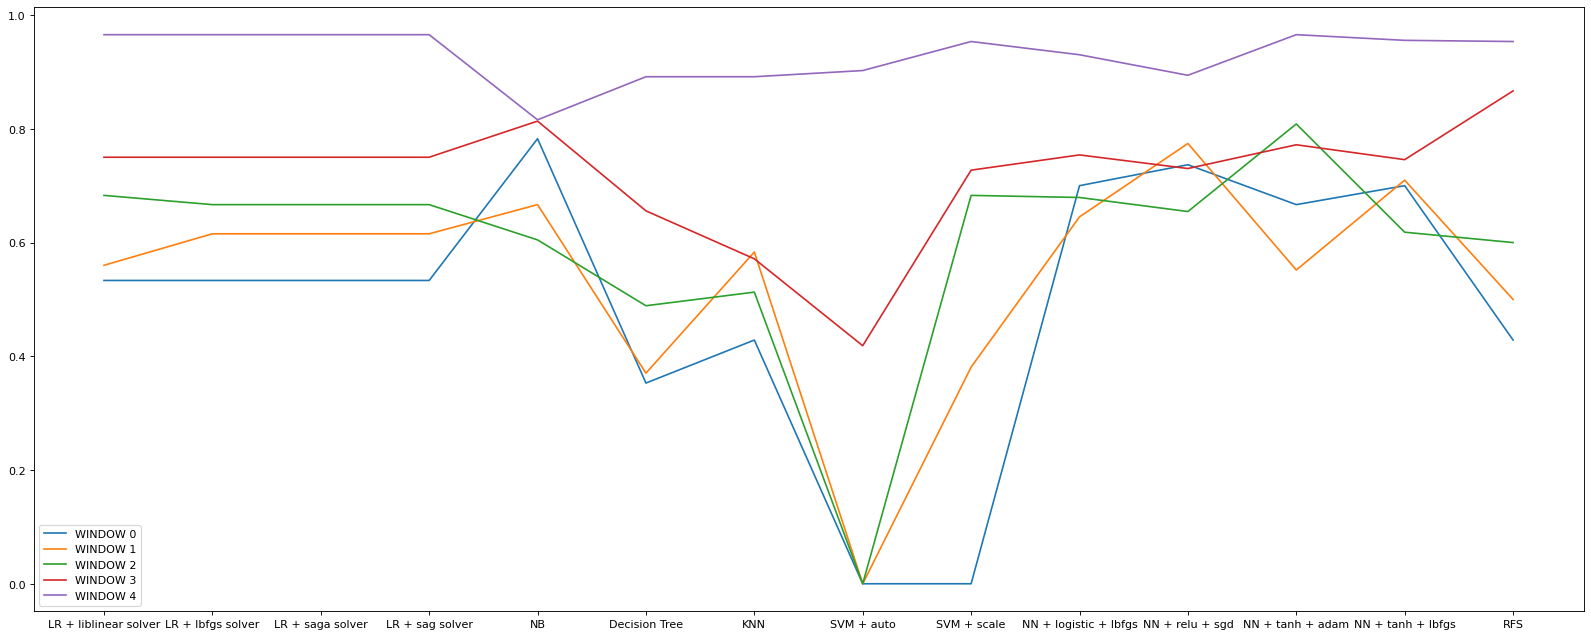

In [38]:
# results of test data
plt.figure(figsize=(25,10), dpi= 80)

for window in range(0, 5):
    plt.plot(name, testres[window], label=window)
plt.legend(['WINDOW 0', 'WINDOW 1', 'WINDOW 2', 'WINDOW 3', 'WINDOW 4'])
plt.show()

In [39]:
from sklearn.metrics import precision_recall_fscore_support as score
print("Scores on WINDOW size: ", str(4))
print()
for i in [0, 13]:
    print("model " + name[i] + ":")
    precision, recall, fscore, support = score(pd.DataFrame(ys[4]).loc[:,"ICU"], preds[4][i])
    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('fscore: {}'.format(fscore))
    print()

Scores on WINDOW size:  4

model LR + liblinear solver:
precision: [0.91428571 1.        ]
recall: [1.         0.93333333]
fscore: [0.95522388 0.96551724]

model RFS:
precision: [0.88888889 1.        ]
recall: [1.         0.91111111]
fscore: [0.94117647 0.95348837]



In [40]:
# till here we reach some good results in predicting if petients need ICU or not according to their symptoms.
# now i am going to predict the ICU column after 12 hours by the value of columns before 5th row for each patient.
# I am going to use different windows to predict if a patient need ICU at his 5th row,
dsWINDOW4 = dataset.loc[dataset['WINDOW'] == 4]
def earlyPrediction(window):
    names = []
    dsWINDOW0 = dataset.loc[dataset['WINDOW'] == window]
    del dsWINDOW0['WINDOW']
    test = SelectKBest(score_func=f_classif, k=10)
    fit = test.fit(dsWINDOW0.iloc[:, 0:len(dsWINDOW0.columns)-1], dsWINDOW4["ICU"])
    dsWINDOW0 = dsWINDOW0.loc[:, (dsWINDOW0 != dsWINDOW0.iloc[0]).any()]
    x = dsWINDOW0.values
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    dsWINDOW0 = pd.DataFrame(x_scaled, columns = dsWINDOW0.columns)
    model = LogisticRegression(solver='liblinear')
    rfe = RFE(model, n_features_to_select=55, step=1000)
    fit = rfe.fit(dsWINDOW0.iloc[:, 0:len(dsWINDOW0.columns)-1], dsWINDOW0['ICU'])
    selected_features = list(fit.support_)
    selected_features.append(True)
    dsWINDOW0 = dsWINDOW0.iloc[:, selected_features]
    # for evaluating different models we need to have train and test data.
    X = dsWINDOW0.iloc[:, 0:len(dsWINDOW0.columns)-1]
    y = dsWINDOW4['ICU']
    from sklearn.model_selection import train_test_split
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=1)
    from warnings import simplefilter
    from sklearn.exceptions import ConvergenceWarning
    simplefilter("ignore", category=ConvergenceWarning)
    models = []
    # 1) Logistic Regression with different parameters
    models.append(LogisticRegression(solver='liblinear', multi_class='ovr', max_iter=1000))
    names.append('LR + liblinear solver')
    models.append(LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000))
    names.append('LR + lbfgs solver')
    models.append(LogisticRegression(solver='saga', multi_class='auto', max_iter=1000))
    names.append('LR + saga solver')
    models.append(LogisticRegression(solver='sag', multi_class='ovr', max_iter=1000))
    names.append('LR + sag solver')
    # 2) Gaussian Naive Bayes
    models.append(GaussianNB())
    names.append('NB')
    # 3) Decision Tree Classifier
    models.append(DecisionTreeClassifier())
    names.append('Decision Tree')
    # 4) K-Nearest Neighbors
    models.append(KNeighborsClassifier())
    names.append('KNN')
    # 5) Support Vector Machine
    models.append(SVC(gamma='auto'))
    names.append('SVM + auto')
    models.append(SVC(gamma='scale'))
    names.append('SVM + scale')
    # 6) Neural Network
    models.append(MLPClassifier(activation='logistic', solver='lbfgs', hidden_layer_sizes=300,  max_iter=1000))
    names.append('NN + logistic + lbfgs')
    models.append(MLPClassifier(activation='relu', solver='lbfgs', hidden_layer_sizes=300, max_iter=1000))
    names.append('NN + relu + sgd')
    models.append(MLPClassifier(activation='tanh', solver='adam', hidden_layer_sizes=300, max_iter=1000))
    names.append('NN + tanh + adam')
    models.append(MLPClassifier(activation='tanh', solver='lbfgs', hidden_layer_sizes=300, max_iter=1000))
    names.append('NN + tanh + lbfgs')
    # 7) Random Forest Classifier
    models.append(RandomForestClassifier(max_depth=30, random_state=0))
    names.append('RFS')
    # training models
    results = []
    res = []
    print("Training models with WINDOW size: " + str(window))
    for i in range(len(models)):
        folds = StratifiedKFold(n_splits=10)
        results.append(cross_val_score(models[i], X_train, Y_train, cv=folds, scoring=metrics.make_scorer(metrics.f1_score, average='weighted')))
        print('%s: %f (%f)' % (names[i], results[i].mean(), results[i].std()))
        res.append(results[i].mean())
    # now we are going to test our models to see which one is better on test dataset.
    test_results = []
    preds = []
    print("Testing models with WINDOW size: " + str(window))
    for i, model in enumerate(models):
        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)
        preds.append(predictions)
        test_results.append(metrics.f1_score(Y_test, predictions))
        print('%s: %f' % (names[i], test_results[i]))
    return names, results, res, test_results, preds, Y_test, models, selected_features

In [41]:
ress = []
trainres = []
testres = []
preds = []
ys = []
models2 = []
selected_features2 = []
for window in range(0, 4):
    name, re, tr, te, pre, y_test, mo, sf = earlyPrediction(window)
    ress.append(re)
    trainres.append(tr)
    testres.append(te)
    preds.append(pre)
    ys.append(y_test)
    models2.append(mo)
    selected_features2.append(sf)

Training models with WINDOW size: 0
LR + liblinear solver: 0.726193 (0.071493)
LR + lbfgs solver: 0.735726 (0.078168)
LR + saga solver: 0.738808 (0.077614)
LR + sag solver: 0.738808 (0.077614)
NB: 0.517377 (0.074675)
Decision Tree: 0.659309 (0.050197)
KNN: 0.572868 (0.067670)
SVM + auto: 0.620365 (0.100866)
SVM + scale: 0.719353 (0.077693)
NN + logistic + lbfgs: 0.695658 (0.039389)
NN + relu + sgd: 0.647654 (0.057748)
NN + tanh + adam: 0.737904 (0.067342)
NN + tanh + lbfgs: 0.605612 (0.064440)
RFS: 0.725686 (0.083534)
Testing models with WINDOW size: 0
LR + liblinear solver: 0.666667
LR + lbfgs solver: 0.692308
LR + saga solver: 0.692308
LR + sag solver: 0.692308
NB: 0.421053
Decision Tree: 0.675676
KNN: 0.666667
SVM + auto: 0.600000
SVM + scale: 0.692308
NN + logistic + lbfgs: 0.675000
NN + relu + sgd: 0.650602
NN + tanh + adam: 0.683544
NN + tanh + lbfgs: 0.650602
RFS: 0.771084
Training models with WINDOW size: 1
LR + liblinear solver: 0.727907 (0.048369)
LR + lbfgs solver: 0.731091 

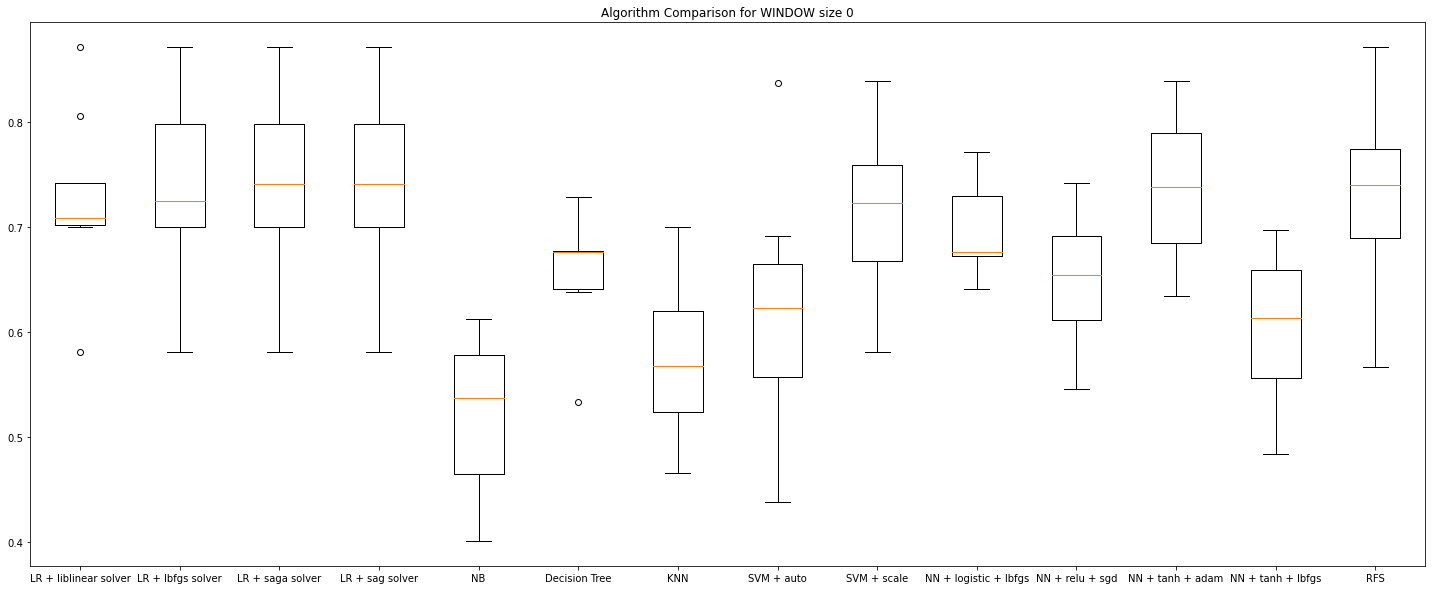

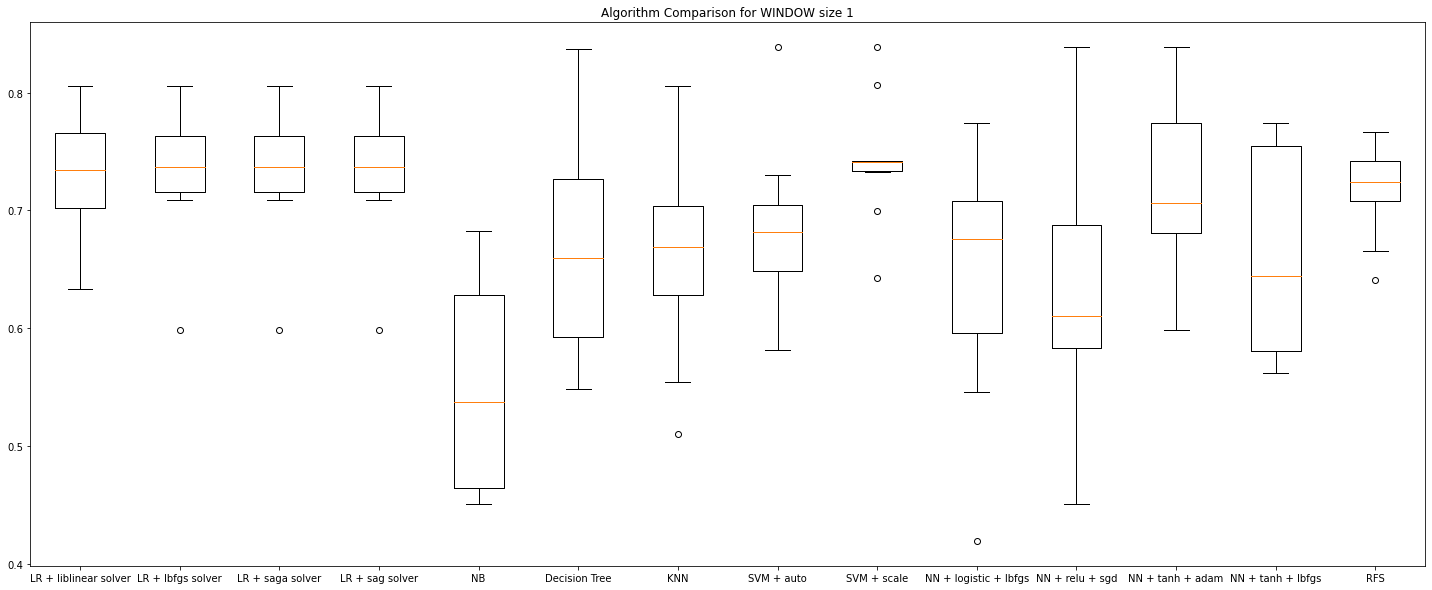

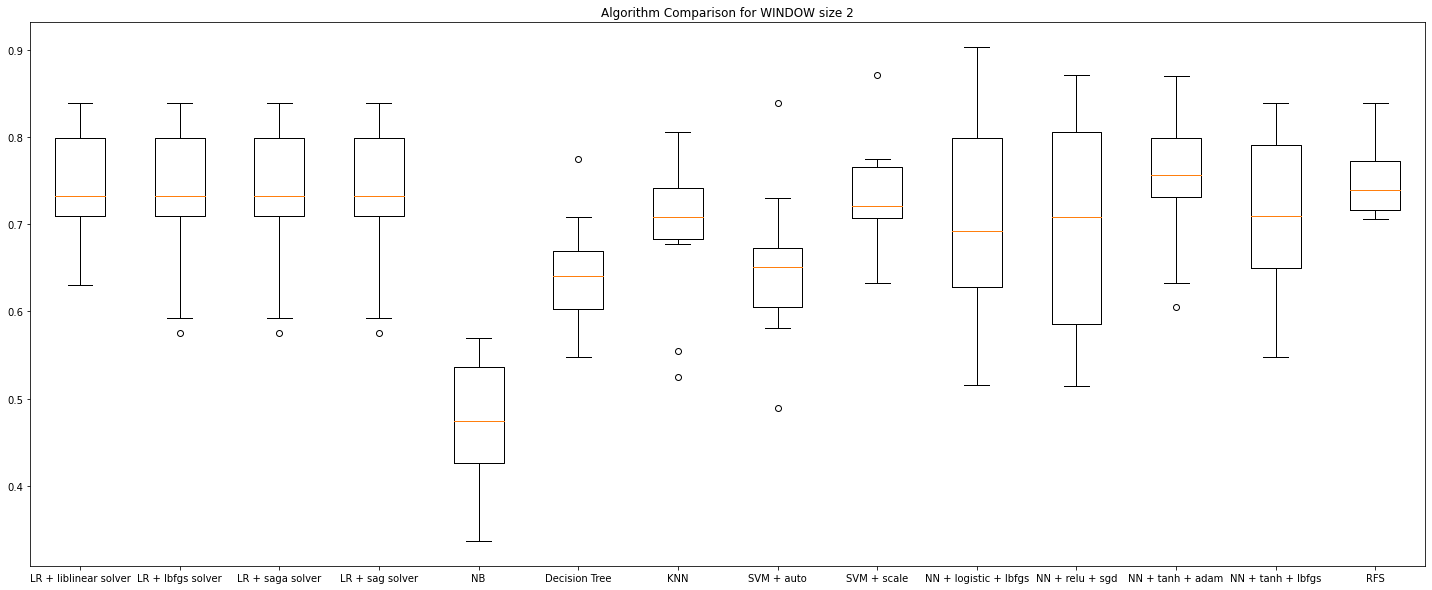

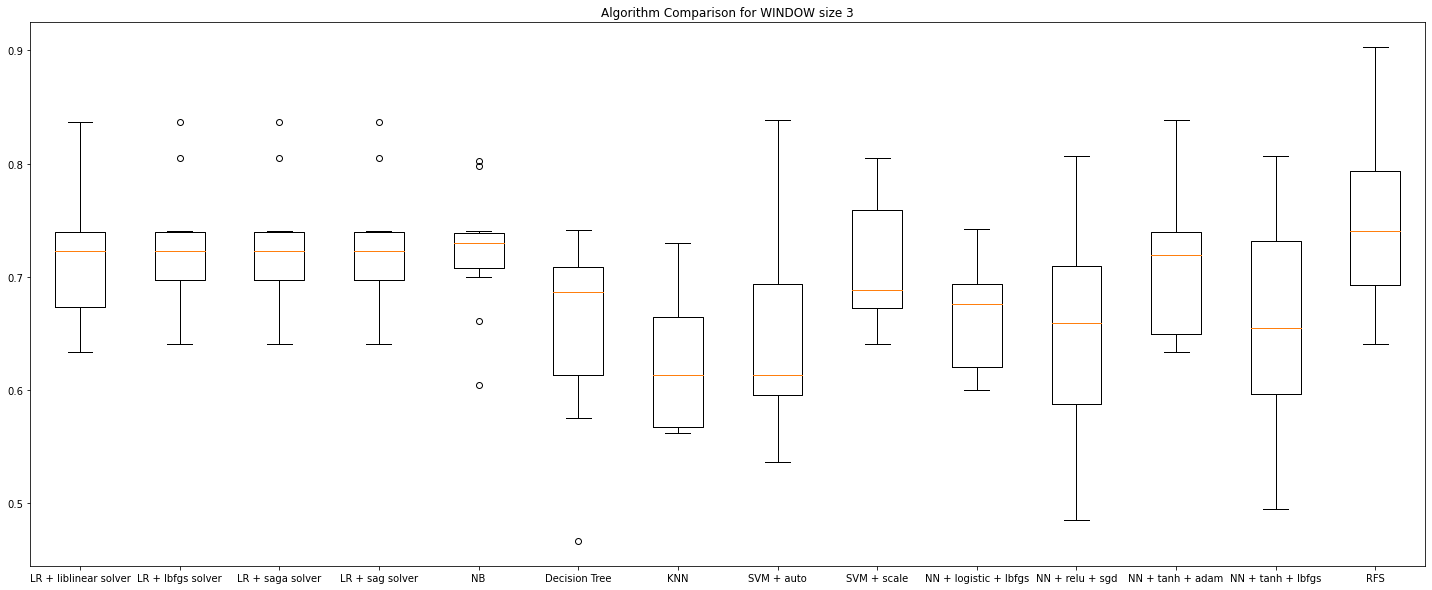

In [42]:
# results of train data
for window in range(0, 4):
    f = plt.figure(figsize=(25, 10))
    plt.boxplot(ress[window], labels=name)
    plt.title('Algorithm Comparison for WINDOW size ' + str(window))
    plt.show()

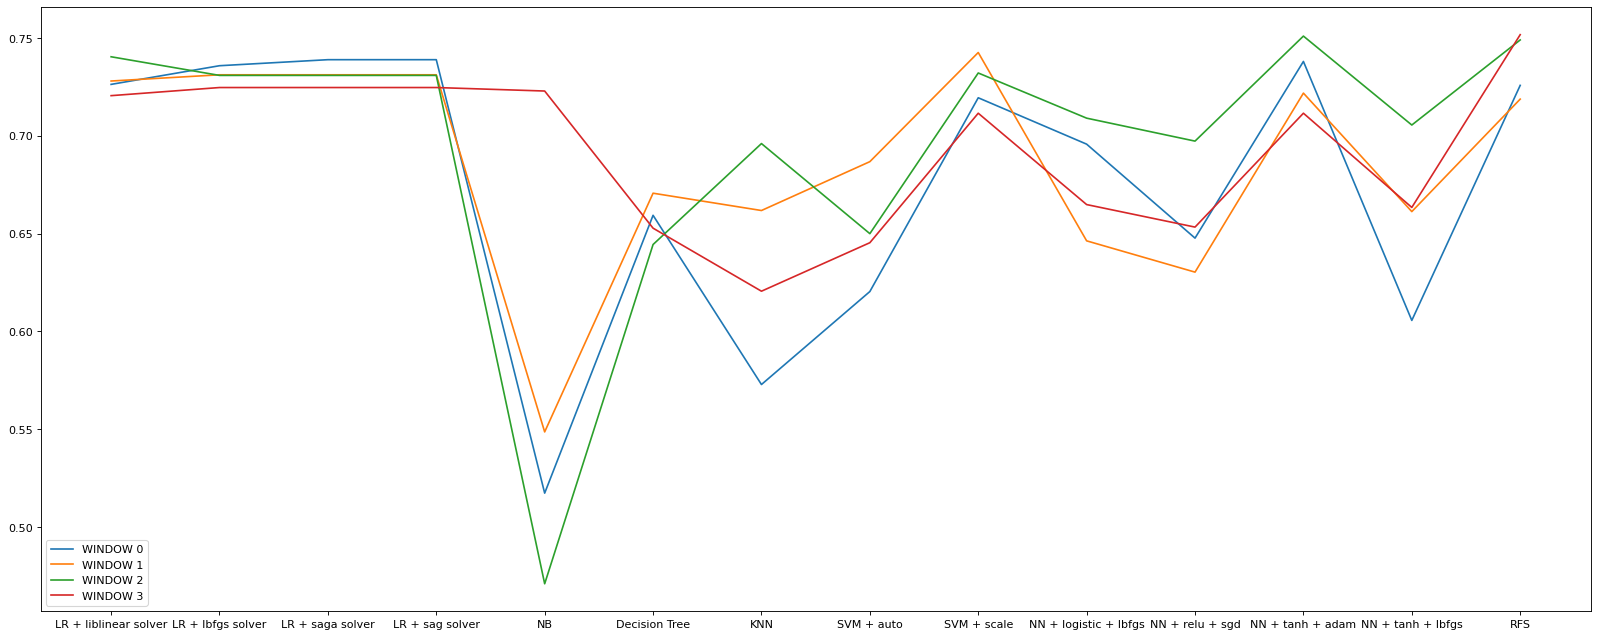

In [43]:
# results of train data
plt.figure(figsize=(25,10), dpi= 80)

for window in range(0, 4):
    plt.plot(name, trainres[window], label=window)
plt.legend(['WINDOW 0', 'WINDOW 1', 'WINDOW 2', 'WINDOW 3'])
plt.show()

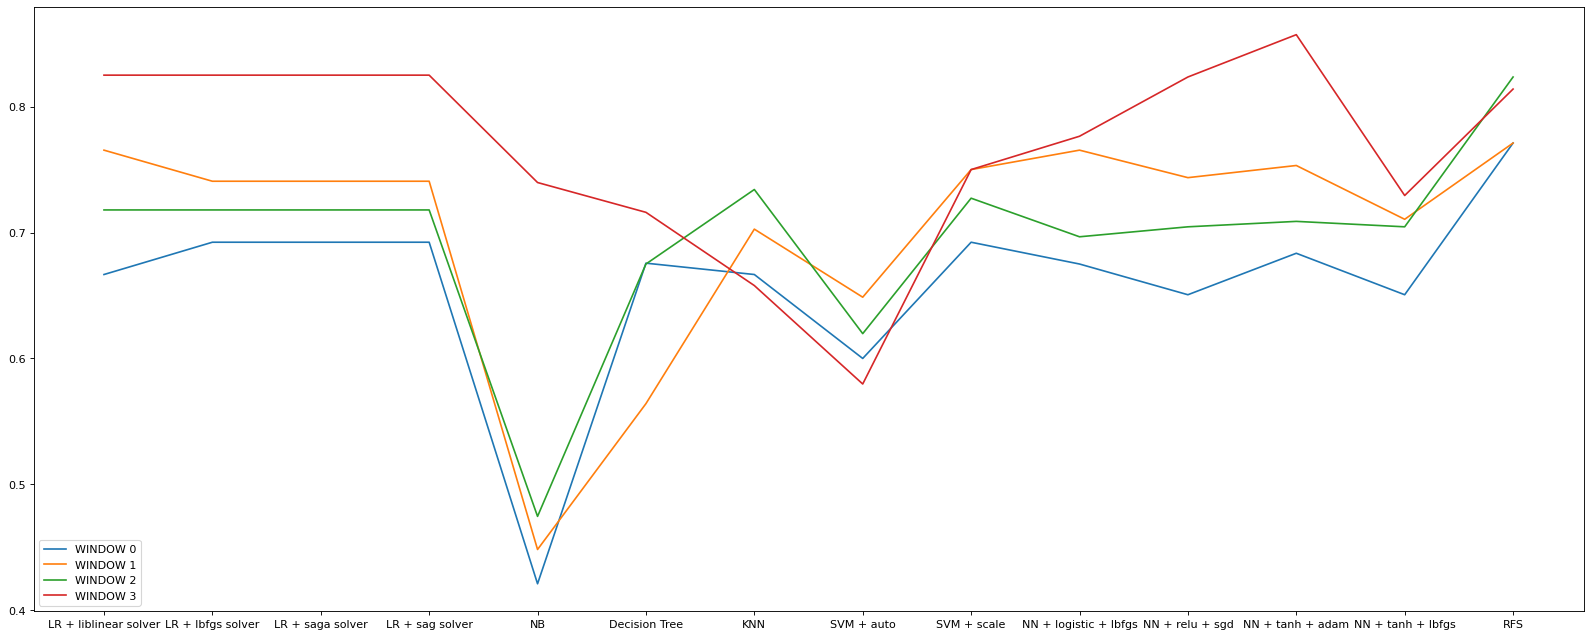

In [44]:
# results of test data
plt.figure(figsize=(25,10), dpi= 80)

for window in range(0, 4):
    plt.plot(name, testres[window], label=window)
plt.legend(['WINDOW 0', 'WINDOW 1', 'WINDOW 2', 'WINDOW 3'])
plt.show()

In [45]:
from sklearn.metrics import precision_recall_fscore_support as score

print("Scores on WINDOW size: ", str(3))
print()
for i in [0, 11, 13]:
    print("model " + name[i] + ":")
    precision, recall, fscore, support = score(pd.DataFrame(ys[window]).loc[:,"ICU"], preds[window][i])
    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('fscore: {}'.format(fscore))
    print()

Scores on WINDOW size:  3

model LR + liblinear solver:
precision: [0.71428571 0.94285714]
recall: [0.9375     0.73333333]
fscore: [0.81081081 0.825     ]

model NN + tanh + adam:
precision: [0.76315789 0.92307692]
recall: [0.90625 0.8    ]
fscore: [0.82857143 0.85714286]

model RFS:
precision: [0.72222222 0.85365854]
recall: [0.8125     0.77777778]
fscore: [0.76470588 0.81395349]



In [46]:
# choosing the best model between RFS and linear regression
# according to above metrics linear regression is the best model for or dataset.

weights for each selected feature


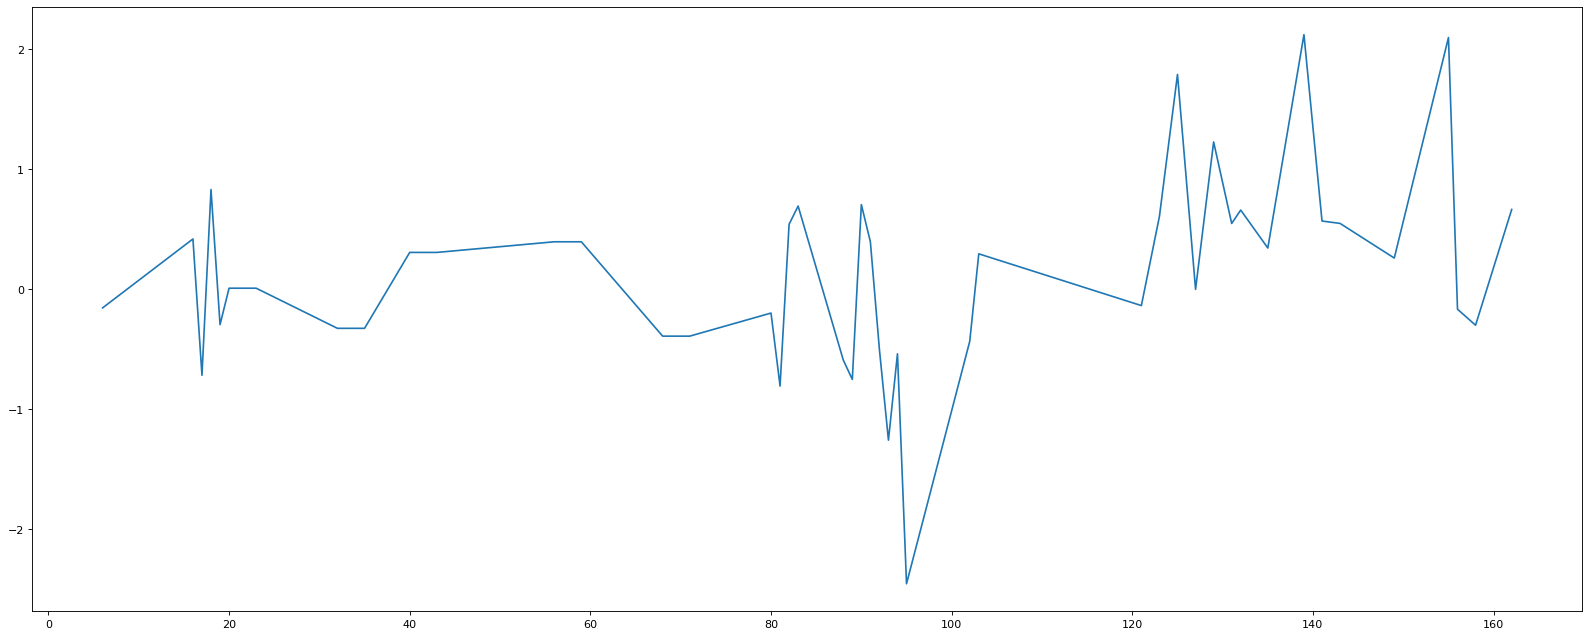

column  Unnamed: 0 weight  [-0.15792558]
column  PATIENT_VISIT_IDENTIFIER weight  [0.41673067]
column  AGE_ABOVE65 weight  [-0.71982363]
column  AGE_PERCENTIL weight  [0.8292179]
column  GENDER weight  [-0.29732954]
column  HTN weight  [0.00620682]
column  IMMUNOCOMPROMISED weight  [0.00620682]
column  OTHER weight  [0.00620682]
column  ALBUMIN_MEDIAN weight  [0.00620682]
column  ALBUMIN_MEAN weight  [-0.32849168]
column  ALBUMIN_MIN weight  [-0.32849168]
column  ALBUMIN_MAX weight  [-0.32849168]
column  ALBUMIN_DIFF weight  [-0.32849168]
column  BE_ARTERIAL_MEDIAN weight  [0.30449573]
column  BE_ARTERIAL_MEAN weight  [0.30449573]
column  BE_ARTERIAL_MIN weight  [0.30449573]
column  BE_ARTERIAL_MAX weight  [0.30449573]
column  BE_ARTERIAL_DIFF weight  [0.39325354]
column  BE_VENOUS_MEDIAN weight  [0.39325354]
column  BE_VENOUS_MEAN weight  [0.39325354]
column  BE_VENOUS_MIN weight  [0.39325354]
column  BE_VENOUS_MAX weight  [-0.39362495]
column  BE_VENOUS_DIFF weight  [-0.39362495]
col

In [47]:
# weights of first type of prediction
cols1 = []
print("weights for each selected feature")
for i in range(len(selected_features1[0])):
    if selected_features1[0][i] == True:
        cols1.append(i)
plt.figure(figsize=(25,10), dpi= 80)
plt.plot(cols1[1:], models1[4][0].coef_.T, label='Lr +liblinear, first type prediction on window = 4')
plt.show()
for i in range(1, len(cols1)):
    print('column ', dataset.columns[i-1], 'weight ', models1[4][0].coef_.T[i-1])

weights for each selected feature


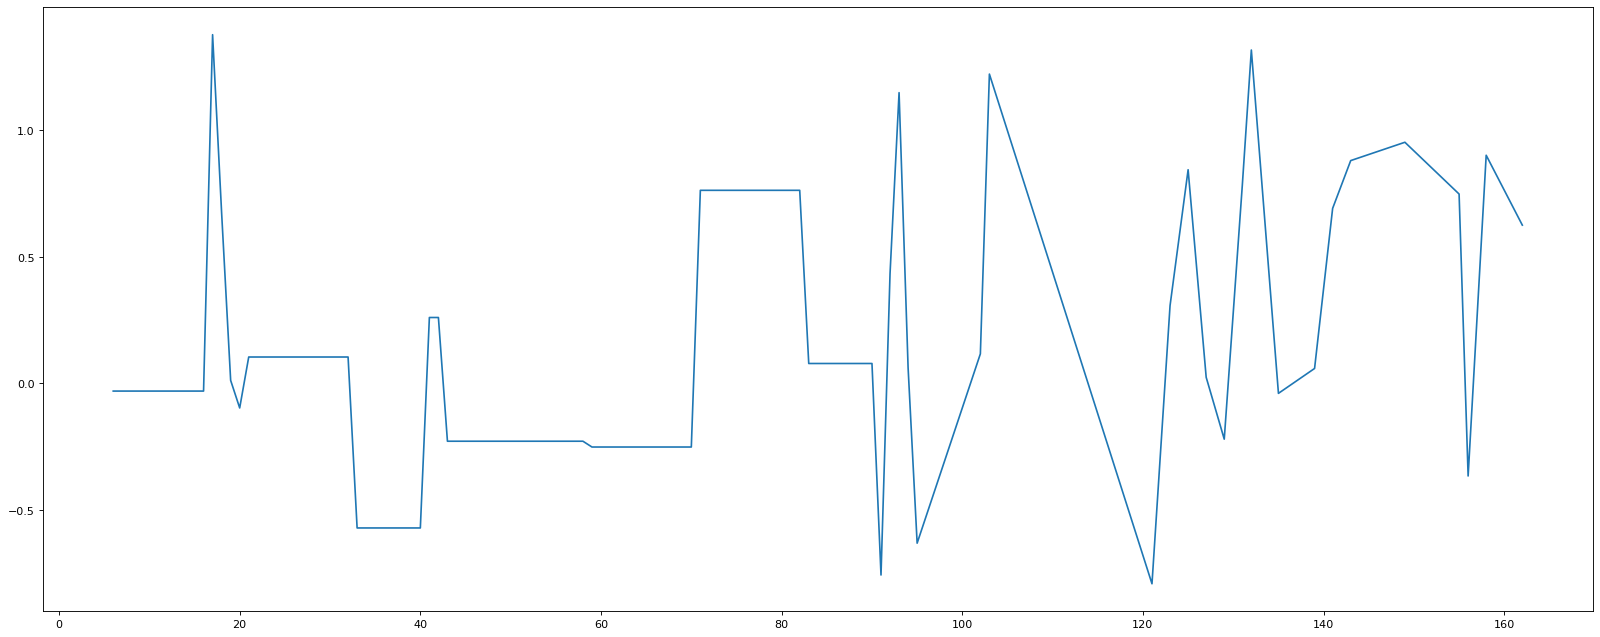

column  Unnamed: 0 weight  [-0.03079659]
column  PATIENT_VISIT_IDENTIFIER weight  [-0.03079659]
column  AGE_ABOVE65 weight  [1.37803209]
column  AGE_PERCENTIL weight  [0.67323675]
column  GENDER weight  [0.01136847]
column  HTN weight  [-0.09755587]
column  IMMUNOCOMPROMISED weight  [0.10385389]
column  OTHER weight  [0.10385389]
column  ALBUMIN_MEDIAN weight  [0.10385389]
column  ALBUMIN_MEAN weight  [0.10385389]
column  ALBUMIN_MIN weight  [-0.57190077]
column  ALBUMIN_MAX weight  [-0.57190077]
column  ALBUMIN_DIFF weight  [-0.57190077]
column  BE_ARTERIAL_MEDIAN weight  [-0.57190077]
column  BE_ARTERIAL_MEAN weight  [0.26002113]
column  BE_ARTERIAL_MIN weight  [0.26002113]
column  BE_ARTERIAL_MAX weight  [-0.22903781]
column  BE_ARTERIAL_DIFF weight  [-0.22903781]
column  BE_VENOUS_MEDIAN weight  [-0.22903781]
column  BE_VENOUS_MEAN weight  [-0.22903781]
column  BE_VENOUS_MIN weight  [-0.25195403]
column  BE_VENOUS_MAX weight  [-0.25195403]
column  BE_VENOUS_DIFF weight  [-0.2519540

In [48]:
# weights of second type of prediction(early prediction)
cols2 = []
print("weights for each selected feature")
for i in range(len(selected_features2[0])):
    if selected_features2[0][i] == True:
        cols2.append(i)
plt.figure(figsize=(25,10), dpi= 80)
plt.plot(cols2[1:], models2[3][0].coef_.T, label='Lr +liblinear, second type prediction on window = 3')
plt.show()
for i in range(1, len(cols2)):
    print('column ', dataset.columns[i-1], 'weight ', models2[3][0].coef_.T[i-1])